In [1]:
# Initial Imports
import requests
import pandas as pd
import json
import numpy as np
from path import Path
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Import API Key
from config import key

# Documentation:
#https://www.worldweatheronline.com/developer/my/analytics.aspx?key_id=222419

In [3]:
# Make a request to the worldweatheronline local history weather API page
def makeARequest(location, startDate, endDate, yourAPIKey):
    baseURL = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx"
    timeInterval = "1"
    outputFormatToReturn = "json"

    requestURL = f"{baseURL}?q={location}&date={startDate}&enddate={endDate}&tp={timeInterval}&format={outputFormatToReturn}&key={yourAPIKey}"
    
    response = requests.get(requestURL)

    if response.status_code == 200:
        responseJson = response.json()
        return responseJson
    else:
        return print(response.status_code)

In [4]:
# Pull the wind variables from the responseJson 
def monthlyHistoricalWeather(firstDayOfMonth, lastDayOfMonth, jsonResponse):
    
    first = datetime.strptime(firstDayOfMonth, '%Y-%m-%d')
    last = datetime.strptime(lastDayOfMonth, '%Y-%m-%d')
    numberOfDays = last.day - first.day

    HourlyHistoricalWeather = []
    
    for day in np.arange(0,numberOfDays + 1,1):
        for hour in np.arange(0,24,1):
            HourlyHistoricalWeather.append({
                "Date" : jsonResponse["data"]["weather"][day]["date"],
                "Time" : jsonResponse["data"]["weather"][day]["hourly"][hour]["time"],
                "WindSpeed_mph" : jsonResponse["data"]["weather"][day]["hourly"][hour]["windspeedMiles"],
                "WindDirection_degrees" : jsonResponse["data"]["weather"][day]["hourly"][hour]["winddirDegree"],
                "WindDirection_compass" : jsonResponse["data"]["weather"][day]["hourly"][hour]["winddir16Point"],
                "WindGust_mph" : jsonResponse["data"]["weather"][day]["hourly"][hour]["WindGustMiles"],
                "Humidity_percent" : jsonResponse["data"]["weather"][day]["hourly"][hour]["humidity"],
                "Temp_F" : jsonResponse["data"]["weather"][day]["hourly"][hour]["tempF"]
            })

    return HourlyHistoricalWeather

In [5]:
# Store the variables in a DataFrame
def monthlyHistoricalWeatherDF(month):
    weatherDataFrame = pd.DataFrame(month)
    return weatherDataFrame

In [6]:
# Define the Latitude and longitude of Hackberry Wind Farm
    # https://www.thewindpower.net/windfarm_en_4012_hackberry.php
    # Latitude: 32.776111
    # Longitude: -99.476444
latLong = "32.776111,-99.476444"

In [7]:
# January
date = "2019-01-01"
enddate = "2019-01-31"

responseJson = makeARequest(latLong, date, enddate, key)

January = monthlyHistoricalWeather(date, enddate, responseJson)
JanuaryDF = monthlyHistoricalWeatherDF(January)
JanuaryDF.head()

Date Time WindSpeed_mph WindDirection_degrees WindDirection_compass  \
0  2019-01-01    0            12                   126                    SE   
1  2019-01-01  100            13                    89                     E   
2  2019-01-01  200            14                    53                    NE   
3  2019-01-01  300            15                    17                   NNE   
4  2019-01-01  400            14                    18                   NNE   

  WindGust_mph Humidity_percent Temp_F  
0           24               73     35  
1           23               74     33  
2           23               76     32  
3           22               77     30  
4           21               77     29

In [8]:
# February
date = "2019-02-01"
enddate = "2019-02-28"

responseJson = makeARequest(latLong, date, enddate, key)

February = monthlyHistoricalWeather(date, enddate, responseJson)
FebruaryDF = monthlyHistoricalWeatherDF(February)

In [9]:

# March
date = "2019-03-01"
enddate = "2019-03-31"

responseJson = makeARequest(latLong, date, enddate, key)

March = monthlyHistoricalWeather(date, enddate, responseJson)
MarchDF = monthlyHistoricalWeatherDF(March)

In [10]:
# April
date = "2019-04-01"
enddate = "2019-04-30"

responseJson = makeARequest(latLong, date, enddate, key)

April = monthlyHistoricalWeather(date, enddate, responseJson)
AprilDF = monthlyHistoricalWeatherDF(April)

In [11]:

# May
date = "2019-05-01"
enddate = "2019-05-31"

responseJson = makeARequest(latLong, date, enddate, key)

May = monthlyHistoricalWeather(date, enddate, responseJson)
MayDF = monthlyHistoricalWeatherDF(May)

In [12]:
# June
date = "2019-06-01"
enddate = "2019-06-30"

responseJson = makeARequest(latLong, date, enddate, key)

June = monthlyHistoricalWeather(date, enddate, responseJson)
JuneDF = monthlyHistoricalWeatherDF(June)

In [13]:

# July
date = "2019-07-01"
enddate = "2019-07-31"

responseJson = makeARequest(latLong, date, enddate, key)

July = monthlyHistoricalWeather(date, enddate, responseJson)
JulyDF = monthlyHistoricalWeatherDF(July)

In [14]:
# August
date = "2019-08-01"
enddate = "2019-08-31"

responseJson = makeARequest(latLong, date, enddate, key)

August = monthlyHistoricalWeather(date, enddate, responseJson)
AugustDF = monthlyHistoricalWeatherDF(August)

In [15]:
# September
date = "2019-09-01"
enddate = "2019-09-30"

responseJson = makeARequest(latLong, date, enddate, key)

September = monthlyHistoricalWeather(date, enddate, responseJson)
SeptemberDF = monthlyHistoricalWeatherDF(September)

In [16]:
# October
date = "2019-10-01"
enddate = "2019-10-31"

responseJson = makeARequest(latLong, date, enddate, key)

October = monthlyHistoricalWeather(date, enddate, responseJson)
OctoberDF = monthlyHistoricalWeatherDF(October)

In [17]:
# November
date = "2019-11-01"
enddate = "2019-11-30"

responseJson = makeARequest(latLong, date, enddate, key)

November = monthlyHistoricalWeather(date, enddate, responseJson)
NovemberDF = monthlyHistoricalWeatherDF(November)

In [18]:
# December
date = "2019-12-01"
enddate = "2019-12-31"

responseJson = makeARequest(latLong, date, enddate, key)

December = monthlyHistoricalWeather(date, enddate, responseJson)
DecemberDF = monthlyHistoricalWeatherDF(December)

In [19]:
# Combine each month into a single DataFrame
hourlyWeatherDF2019 = JanuaryDF.append([FebruaryDF, MarchDF, AprilDF, MayDF, JuneDF, JulyDF, AugustDF, SeptemberDF, OctoberDF, NovemberDF, DecemberDF]) 
index = np.arange(0,24*365,1)
hourlyWeatherDF2019 = hourlyWeatherDF2019.set_index(index)
hourlyWeatherDF2019

Date  Time WindSpeed_mph WindDirection_degrees  \
0     2019-01-01     0            12                   126   
1     2019-01-01   100            13                    89   
2     2019-01-01   200            14                    53   
3     2019-01-01   300            15                    17   
4     2019-01-01   400            14                    18   
...          ...   ...           ...                   ...   
8755  2019-12-31  1900             6                   175   
8756  2019-12-31  2000             6                   176   
8757  2019-12-31  2100             7                   176   
8758  2019-12-31  2200             7                   176   
8759  2019-12-31  2300             7                   175   

     WindDirection_compass WindGust_mph Humidity_percent Temp_F  
0                       SE           24               73     35  
1                        E           23               74     33  
2                       NE           23               76     32  
3                      NNE           22               77     30  
4                      NNE           21               77     29  
...                    ...          ...              ...    ...  
8755                     S           12               39     49  
8756                     S           13               42     47  
8757                     S           14               45     46  
8758                     S           15               46     46  
8759                     S           16               48     45  

[8760 rows x 8 columns]

In [20]:
hourlyWeatherDF2019.dtypes

Date                     object
Time                     object
WindSpeed_mph            object
WindDirection_degrees    object
WindDirection_compass    object
WindGust_mph             object
Humidity_percent         object
Temp_F                   object
dtype: object

# Performing ETL on Wind Data at Hackberry Wind Farm

In [21]:
hourlyWeatherDF2019['Date'] = pd.to_datetime(hourlyWeatherDF2019['Date'] )

In [22]:
hourlyWeatherDF2019.dtypes

Date                     datetime64[ns]
Time                             object
WindSpeed_mph                    object
WindDirection_degrees            object
WindDirection_compass            object
WindGust_mph                     object
Humidity_percent                 object
Temp_F                           object
dtype: object

In [23]:
hourlyWeatherDF2019['Time'] = hourlyWeatherDF2019['Time'].astype(int)

In [24]:
hourlyWeatherDF2019['Time'] = hourlyWeatherDF2019['Time']/100

In [25]:
hourlyWeatherDF2019['Time'] = hourlyWeatherDF2019['Time'].astype(int)

In [26]:
hourlyWeatherDF2019['time'] =pd.to_timedelta(hourlyWeatherDF2019['Time'], unit='h')

In [27]:
# Creating new column called 'hour' in timedelta format without date
hourlyWeatherDF2019['time'] = hourlyWeatherDF2019['time'] - pd.to_timedelta(hourlyWeatherDF2019['time'].dt.days, unit='d')

In [28]:
hourlyWeatherDF2019.dtypes

Date                      datetime64[ns]
Time                               int32
WindSpeed_mph                     object
WindDirection_degrees             object
WindDirection_compass             object
WindGust_mph                      object
Humidity_percent                  object
Temp_F                            object
time                     timedelta64[ns]
dtype: object

In [29]:
# Combining Date and hour to a single column as they are in datetime and timedelta formats
hourlyWeatherDF2019['time_combined'] = hourlyWeatherDF2019['Date'] + hourlyWeatherDF2019['time']

In [30]:
# Dropping the original 'Time' column from 
hourlyWeatherDF2019 = hourlyWeatherDF2019.drop(['Time', 'Date', 'time'], 1)

In [31]:
# Renaming time column name.
hourlyWeatherDF2019.rename(columns = {'time_combined':'time'}, inplace = True)

In [32]:
# Re-arranging the column headers
hourlyWeatherDF2019 = hourlyWeatherDF2019[['time', 'WindSpeed_mph', 'WindDirection_degrees', 'WindDirection_compass', 'WindGust_mph', 'Temp_F', 'Humidity_percent']]

In [33]:
weather2019Clean = hourlyWeatherDF2019.drop(hourlyWeatherDF2019.index[0])

In [34]:
weather2019Clean.to_csv(r'Output/weather_wind.csv', index = False)

In [35]:
weather2019Clean.copy()

time WindSpeed_mph WindDirection_degrees  \
1    2019-01-01 01:00:00            13                    89   
2    2019-01-01 02:00:00            14                    53   
3    2019-01-01 03:00:00            15                    17   
4    2019-01-01 04:00:00            14                    18   
5    2019-01-01 05:00:00            14                    19   
...                  ...           ...                   ...   
8755 2019-12-31 19:00:00             6                   175   
8756 2019-12-31 20:00:00             6                   176   
8757 2019-12-31 21:00:00             7                   176   
8758 2019-12-31 22:00:00             7                   176   
8759 2019-12-31 23:00:00             7                   175   

     WindDirection_compass WindGust_mph Temp_F Humidity_percent  
1                        E           23     33               74  
2                       NE           23     32               76  
3                      NNE           22     30               77  
4                      NNE           21     29               77  
5                      NNE           20     28               76  
...                    ...          ...    ...              ...  
8755                     S           12     49               39  
8756                     S           13     47               42  
8757                     S           14     46               45  
8758                     S           15     46               46  
8759                     S           16     45               48  

[8759 rows x 7 columns]

# Importing and Performing ETL on Hackberry Wind Energy Data

In [36]:
data = "Resources/Hackberry_Generation.csv"
Hackberry_df = pd.read_csv(data)
Hackberry_df

Unit      Date Hour Ending         MWH
0      HWF_HWFG1  20190101         100  110.487950
1      HWF_HWFG1  20190101         200   72.020225
2      HWF_HWFG1  20190101         300   67.639475
3      HWF_HWFG1  20190101         400   63.718900
4      HWF_HWFG1  20190101         500   61.264250
...          ...       ...         ...         ...
13866  HWF_HWFG1  20200731        2000    4.998600
13867  HWF_HWFG1  20200731        2100   16.390275
13868  HWF_HWFG1  20200731        2200   20.637800
13869  HWF_HWFG1  20200731        2300   13.998975
13870  HWF_HWFG1  20200731        2400   12.494875

[13871 rows x 4 columns]

In [37]:
Hackberry_df.dtypes

Unit            object
Date             int64
Hour Ending     object
MWH            float64
dtype: object

In [38]:
# Dropping Unit Column
Hackberry_df = Hackberry_df.drop('Unit', 1)

In [39]:
# Renaming column name from 'Hour Ending' to 'Hour'
Hackberry_df.rename(columns = {'Hour Ending':'Hour'}, inplace = True)

In [40]:
# Converting Date to datetime
Hackberry_df['Date'] = pd.to_datetime(Hackberry_df['Date'], format='%Y%m%d')

In [41]:
# Checking data type
Hackberry_df.dtypes

Date    datetime64[ns]
Hour            object
MWH            float64
dtype: object

In [42]:
# Removing the last two characters from the hour column as the times are hourly
Hackberry_df['Hour'] = Hackberry_df['Hour'].astype(str).str[:-2].astype(np.int64)

In [43]:
# Checking Hour data type
Hackberry_df.dtypes

Date    datetime64[ns]
Hour             int64
MWH            float64
dtype: object

In [44]:
Hackberry_df['hour'] =pd.to_timedelta(Hackberry_df['Hour'], unit='h')

In [45]:
# Creating new column called 'hour' in timedelta format without date
Hackberry_df['hour'] = Hackberry_df['hour'] - pd.to_timedelta(Hackberry_df['hour'].dt.days, unit='d')

In [46]:
# Dropping the original 'Hour' column
Hackberry_df = Hackberry_df.drop('Hour', 1)

In [47]:
# Re-arranging the column headers
Hackberry_df = Hackberry_df[["Date", "hour", "MWH"]]

In [48]:
Hackberry_df.dtypes

Date     datetime64[ns]
hour    timedelta64[ns]
MWH             float64
dtype: object

In [49]:
# Combining Date and hour to a single column as they are in datetime and timedelta formats
Hackberry_df['time'] = Hackberry_df['Date'] + Hackberry_df['hour']

In [50]:
# Re-arranging the column headers and removing the Date and hour columns
Hackberry_df = Hackberry_df[["time", "MWH"]]

In [51]:
Hackberry_df.dtypes

time    datetime64[ns]
MWH            float64
dtype: object

In [52]:
Hackberry_df.copy()

time         MWH
0     2019-01-01 01:00:00  110.487950
1     2019-01-01 02:00:00   72.020225
2     2019-01-01 03:00:00   67.639475
3     2019-01-01 04:00:00   63.718900
4     2019-01-01 05:00:00   61.264250
...                   ...         ...
13866 2020-07-31 20:00:00    4.998600
13867 2020-07-31 21:00:00   16.390275
13868 2020-07-31 22:00:00   20.637800
13869 2020-07-31 23:00:00   13.998975
13870 2020-07-31 00:00:00   12.494875

[13871 rows x 2 columns]

In [53]:
# Removing rows to include only 2019 year data to include same time range as wind data
Hackberry2019 = Hackberry_df.drop(Hackberry_df.index[8759:13871])

In [54]:
Hackberry2019.to_csv(r'Output/Hackberry_MHW.csv', index = False)

## Merging Hackberry Energy Data with Wind Data

In [55]:
hackberryWindMWH = pd.merge(weather2019Clean, Hackberry2019, on='time', how='outer')

In [56]:
hackberryWindMWH =hackberryWindMWH.drop(hackberryWindMWH.index[8760])

In [57]:
hackberryWindMWH.to_csv(r'Output/Hackberry_Wind_MHW.csv', index = False)

In [58]:
hackberryWindMWH.copy()

time WindSpeed_mph WindDirection_degrees  \
0    2019-01-01 01:00:00            13                    89   
1    2019-01-01 02:00:00            14                    53   
2    2019-01-01 03:00:00            15                    17   
3    2019-01-01 04:00:00            14                    18   
4    2019-01-01 05:00:00            14                    19   
...                  ...           ...                   ...   
8755 2019-12-31 19:00:00             6                   175   
8756 2019-12-31 20:00:00             6                   176   
8757 2019-12-31 21:00:00             7                   176   
8758 2019-12-31 22:00:00             7                   176   
8759 2019-12-31 23:00:00             7                   175   

     WindDirection_compass WindGust_mph Temp_F Humidity_percent         MWH  
0                        E           23     33               74  110.487950  
1                       NE           23     32               76   72.020225  
2                      NNE           22     30               77   67.639475  
3                      NNE           21     29               77   63.718900  
4                      NNE           20     28               76   61.264250  
...                    ...          ...    ...              ...         ...  
8755                     S           12     49               39   15.506725  
8756                     S           13     47               42   32.191125  
8757                     S           14     46               45   40.677250  
8758                     S           15     46               46   45.826475  
8759                     S           16     45               48   59.101325  

[8760 rows x 8 columns]

In [59]:
# YThere are 72 turbines in Hackberry Farm.
hackberryWindMWH['MWH'] = hackberryWindMWH['MWH']/72

In [60]:
hackberry = hackberryWindMWH.dropna()

## Linear Regression

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [63]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

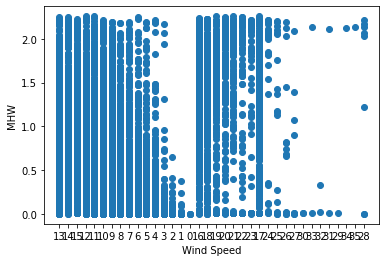

In [64]:
# Visually inspect the data
plt.scatter(hackberry.WindSpeed_mph, hackberry.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MHW')
plt.show()

##  It can be concluded that linear regression on wind speed alone does not track the power generated.  Direction of wind needs to be included.

In [65]:
# Creating dataframe with wind direction blowing West
windWest = hackberry[hackberry.WindDirection_compass == 'W']

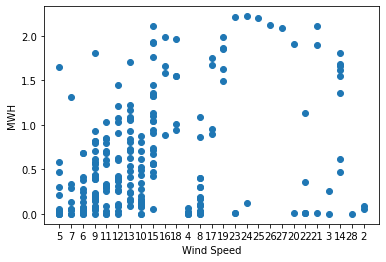

In [66]:
# Visually inspect the data of wind speed to MWH for winds blowing West.
plt.scatter(windWest.WindSpeed_mph, windWest.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [67]:
# Creating dataframe with wind direction blowing south
windSouth = hackberry[hackberry.WindDirection_compass == 'S']

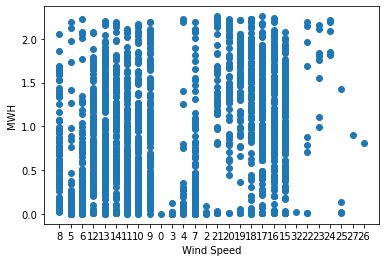

In [68]:
# Visually inspect the data of wind speed to MWH for winds blowing South.
plt.scatter(windSouth.WindSpeed_mph, windSouth.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [69]:
# Creating dataframe with wind direction blowing North
windNorth = hackberry[hackberry.WindDirection_compass == 'N']

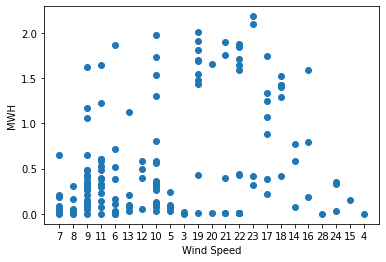

In [70]:
# Visually inspect the data of wind speed to MWH for winds blowing North.
plt.scatter(windNorth.WindSpeed_mph, windNorth.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [71]:
# Creating dataframe with wind direction blowing NE
windNE = hackberry[hackberry.WindDirection_compass == 'NE']

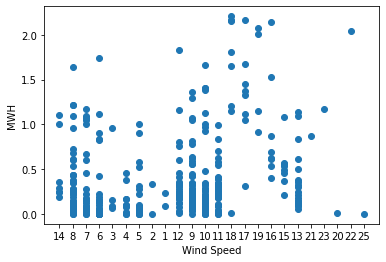

In [72]:
# Visually inspect the data of wind speed to MWH for winds blowing NE.
plt.scatter(windNE.WindSpeed_mph, windNE.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [73]:
# Creating dataframe with wind direction blowing NW
windNW = hackberry[hackberry.WindDirection_compass == 'NW']

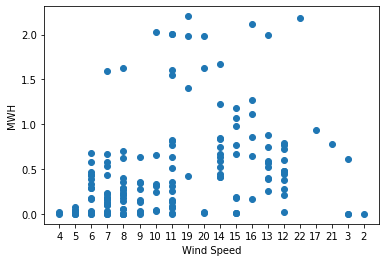

In [74]:
# Visually inspect the data of wind speed to MWH for winds blowing NW.
plt.scatter(windNW.WindSpeed_mph, windNW.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [75]:
# Creating dataframe with wind direction blowing NNE
windNNE = hackberry[hackberry.WindDirection_compass == 'NNE']

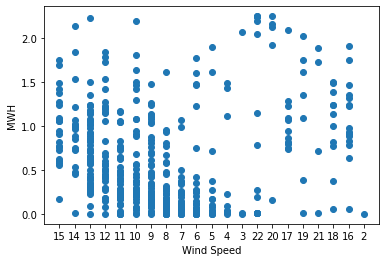

In [76]:
# Visually inspect the data of wind speed to MWH for winds blowing NNE.
plt.scatter(windNNE.WindSpeed_mph, windNNE.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [77]:
# Creating dataframe with wind direction blowing NNW
windNNW = hackberry[hackberry.WindDirection_compass == 'NNW']

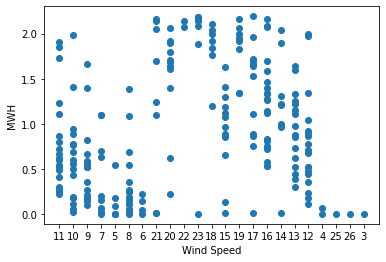

In [78]:
# Visually inspect the data of wind speed to MWH for winds blowing NNW.
plt.scatter(windNNW.WindSpeed_mph, windNNW.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [79]:
# Creating a dictionary with wind direction
#directions = {
#    "N": 1,
#   "S": 2,
#   "E": 3,
#   "W": 4,
#   "NE": 5,
#  "NW": 6,
#   "NNE": 7,
#   "NNW": 8,
#   "SE": 11,
#   "SW": 12,
#   "SSE": 13,
#    "SSW":14,
#    "WNW":15,
#    "WSW":16,
#    "ENE":17,
#    "ESE":18,
    
#}

In [80]:
hackberry = pd.get_dummies(hackberry, columns=['time'])

In [81]:
#hackberry["direction"] = hackberry["WindDirection_compass"].apply(lambda x: directions[x])

In [82]:
hackberry.to_csv(r'Output/hackberry_encoded.csv', index = False)

In [83]:
data = "Output/hackberry_encoded.csv"
hackberry_encoded = pd.read_csv(data)
hackberry_encoded

WindSpeed_mph  WindDirection_degrees WindDirection_compass  \
0                13                     89                     E   
1                14                     53                    NE   
2                15                     17                   NNE   
3                14                     18                   NNE   
4                14                     19                   NNE   
...             ...                    ...                   ...   
8753              6                    175                     S   
8754              6                    176                     S   
8755              7                    176                     S   
8756              7                    176                     S   
8757              7                    175                     S   

      WindGust_mph  Temp_F  Humidity_percent       MWH  \
0               23      33                74  1.534555   
1               23      32                76  1.000281   
2               22      30                77  0.939437   
3               21      29                77  0.884985   
4               20      28                76  0.850892   
...            ...     ...               ...       ...   
8753            12      49                39  0.215371   
8754            13      47                42  0.447099   
8755            14      46                45  0.564962   
8756            15      46                46  0.636479   
8757            16      45                48  0.820852   

      time_2019-01-01 01:00:00  time_2019-01-01 02:00:00  \
0                            1                         0   
1                            0                         1   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8753                         0                         0   
8754                         0                         0   
8755                         0                         0   
8756                         0                         0   
8757                         0                         0   

      time_2019-01-01 03:00:00  ...  time_2019-12-31 14:00:00  \
0                            0  ...                         0   
1                            0  ...                         0   
2                            1  ...                         0   
3                            0  ...                         0   
4                            0  ...                         0   
...                        ...  ...                       ...   
8753                         0  ...                         0   
8754                         0  ...                         0   
8755                         0  ...                         0   
8756                         0  ...                         0   
8757                         0  ...                         0   

      time_2019-12-31 15:00:00  time_2019-12-31 16:00:00  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8753                         0                         0   
8754                         0                         0   
8755                         0                         0   
8756                         0                         0   
8757                         0                         0   

      time_2019-12-31 17:00:00  time_2019-12-31 18:00:00  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            

In [84]:
#hackberry_encoded = hackberry_encoded(["time", date(2007,8,31)], dtype='datetime64')

In [85]:
#hackberryEncoded = hackberry_encoded.drop(["time", "WindDirection_compass"], axis=1)

In [88]:
hackberryEncoded = hackberry_encoded.drop(["WindDirection_compass"], axis=1)

In [89]:
hackberryEncoded["WindSpeed_mph"] = hackberryEncoded["WindSpeed_mph"].round(0).astype(int)

In [90]:
hackberryEncoded["WindDirection_degrees"] = hackberryEncoded["WindDirection_degrees"].round(0).astype(int)

In [91]:
hackberryEncoded["WindGust_mph"] = hackberryEncoded["WindGust_mph"].round(0).astype(int)

In [92]:
hackberryEncoded["MWH"] = hackberryEncoded["MWH"].round(0).astype(int)

In [93]:
# Creating the scaler instance
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [94]:
hackberry_scaled = data_scaler.fit_transform(hackberryEncoded)

In [95]:
hackberry_scaled[:5]

array([[ 0.3608004 , -1.05022902,  0.74188853, ..., -0.01068618,
        -0.01068618, -0.01068618],
       [ 0.56803347, -1.53116107,  0.74188853, ..., -0.01068618,
        -0.01068618, -0.01068618],
       [ 0.77526654, -2.01209313,  0.60454765, ..., -0.01068618,
        -0.01068618, -0.01068618],
       [ 0.56803347, -1.99873391,  0.46720677, ..., -0.01068618,
        -0.01068618, -0.01068618],
       [ 0.56803347, -1.98537468,  0.32986589, ..., -0.01068618,
        -0.01068618, -0.01068618]])

In [96]:
print(np.mean(hackberry_scaled[:,0]))
print(np.std(hackberry_scaled[:,0]))

-1.1196037626729142e-16
1.0


In [97]:
# Define the features set.
X = hackberryEncoded.copy()
X = X.drop("MWH", axis=1)
X.head()

WindSpeed_mph  WindDirection_degrees  WindGust_mph  Temp_F  \
0             13                     89            23      33   
1             14                     53            23      32   
2             15                     17            22      30   
3             14                     18            21      29   
4             14                     19            20      28   

   Humidity_percent  time_2019-01-01 01:00:00  time_2019-01-01 02:00:00  \
0                74                         1                         0   
1                76                         0                         1   
2                77                         0                         0   
3                77                         0                         0   
4                76                         0                         0   

   time_2019-01-01 03:00:00  time_2019-01-01 04:00:00  \
0                         0                         0   
1                         0                         0   
2                         1                         0   
3                         0                         1   
4                         0                         0   

   time_2019-01-01 05:00:00  ...  time_2019-12-31 14:00:00  \
0                         0  ...                         0   
1                         0  ...                         0   
2                         0  ...                         0   
3                         0  ...                         0   
4                         1  ...                         0   

   time_2019-12-31 15:00:00  time_2019-12-31 16:00:00  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   time_2019-12-31 17:00:00  time_2019-12-31 18:00:00  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   time_2019-12-31 19:00:00  time_2019-12-31 20:00:00  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   time_2019-12-31 21:00:00  time_2019-12-31 22:00:00  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   time_2019-12-31 23:00:00  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 8762 columns]

In [98]:
# Define the target set.
y = hackberryEncoded["MWH"].ravel()
y[:5]

array([2, 1, 1, 1, 1])

In [99]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [100]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [101]:
# Determine the shape of training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6568, 8762)
(2190, 8762)
(6568,)
(2190,)


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 5, n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)

In [ ]:
y_train_preds = rf.predict_proba(X_train)[:,1]
y_valid_preds = rf.predict_proba(X_valid)[:,1]

# Using Balanced Random Forest Classifier

In [102]:
# Resample the training data with the RandomOversampler
from imblearn.ensemble import BalancedRandomForestClassifier
brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brfc.fit(X_train, y_train)
Counter(y_train)

Counter({0: 3089, 1: 2421, 2: 1058})

In [103]:
# Calculated the balanced accuracy score
y_pred = brfc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7061678903028561

In [104]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[742, 165, 100],
       [129, 427, 217],
       [ 11,  59, 340]], dtype=int64)

In [105]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.74      0.88      0.79      0.81      0.64      1007
          1       0.66      0.55      0.84      0.60      0.68      0.45       773
          2       0.52      0.83      0.82      0.64      0.83      0.68       410

avg / total       0.72      0.69      0.86      0.69      0.77      0.58      2190



In [106]:
# List the features sorted in descending order by feature importance
importances = brfc.feature_importances_
sorted(zip(brfc.feature_importances_, X.columns), reverse=True)

[(0.18455733388097578, 'WindGust_mph'),
 (0.08468364630309458, 'WindSpeed_mph'),
 (0.08395041191811829, 'WindDirection_degrees'),
 (0.06248658563884681, 'Temp_F'),
 (0.05983917358876467, 'Humidity_percent'),
 (0.0005463807182342046, 'time_2019-03-20 11:00:00'),
 (0.0005418158451247025, 'time_2019-12-11 00:00:00'),
 (0.0005350423753622238, 'time_2019-06-11 00:00:00'),
 (0.0005278015370771928, 'time_2019-10-05 00:00:00'),
 (0.0005272814183402244, 'time_2019-08-23 18:00:00'),
 (0.0004998585471080218, 'time_2019-08-30 15:00:00'),
 (0.0004879116669753661, 'time_2019-12-14 00:00:00'),
 (0.00046399057628138834, 'time_2019-05-31 08:00:00'),
 (0.0004612403728213696, 'time_2019-03-31 04:00:00'),
 (0.00045895584767577776, 'time_2019-12-07 00:00:00'),
 (0.0004497292985437827, 'time_2019-07-04 07:00:00'),
 (0.00044769546078256175, 'time_2019-06-20 06:00:00'),
 (0.00044705256014810095, 'time_2019-11-03 00:00:00'),
 (0.0004381802757444118, 'time_2019-02-06 22:00:00'),
 (0.0004347851119731592, 'time_2